In [20]:
from glob import glob
import rasterio
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import utils
from classification import add_colorbar

Load PM2.5 Input time series (`utils.open_pm25`)

In [3]:
def open_pm25(no_data_val=-999):
    files = glob("data/PM2_5/*.tif")
    pm25 = []
    if not os.path.isfile("data/PM2_5/pm25.npy"):
        try:
            for f in files:
                with rasterio.open(f) as src:
                    pm25.append(src.read(1))
            pm25 = np.stack(pm25, axis=-1)
            pm25[pm25 == no_data_val] = np.nan
        except NameError:  # if could not install rasterio, fall back to saved numpy array
            pm25 = np.load("data/PM2_5/pm25.npy")
    else:
        pm25 = np.load("data/PM2_5/pm25.npy")
    return pm25

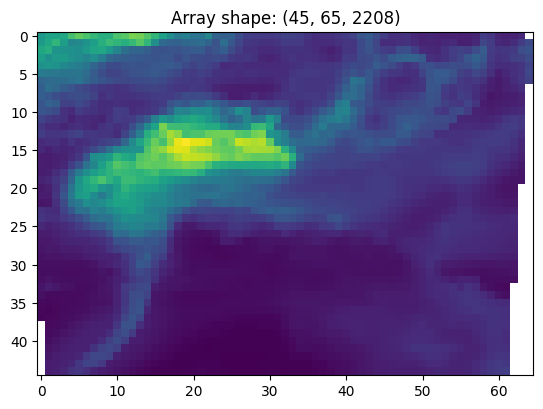

In [17]:
pm25 = open_pm25()
fig, ax = plt.subplots()
ax.imshow(pm25[:, :, 0])
ax.set_title(f"Array shape: {pm25.shape}")
plt.show()

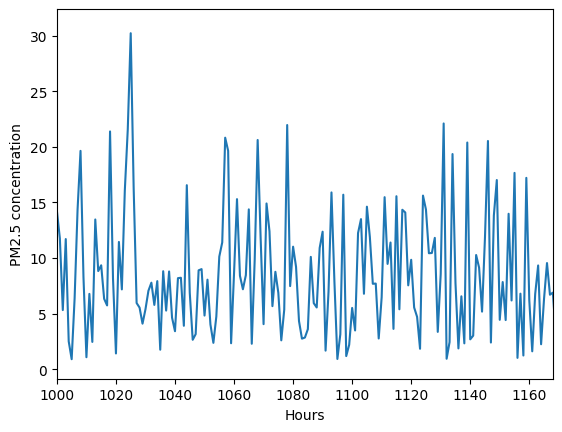

In [18]:
fig, ax = plt.subplots()
ax.plot(pm25[0, 0, :])
ax.set_xlim(1000, 1000 + 24 * 7)
ax.set_ylabel("PM2.5 concentration")
ax.set_xlabel("Hours")
plt.show()

Load land cover map (`utils.open_land_cover`)

In [12]:
def open_land_cover(no_data_val=[0, 128]):
    try:
        land_cover_tif = rasterio.open("data/corine/land_cover_level_2.tif").read(1).astype(float)
        for ndv in no_data_val:
            land_cover_tif[land_cover_tif == ndv] = np.nan
    except NameError:  # if could not install rasterio, fall back to saved numpy array
        land_cover_tif = np.load("data/corine/lc_level_2.npy")
    return land_cover_tif

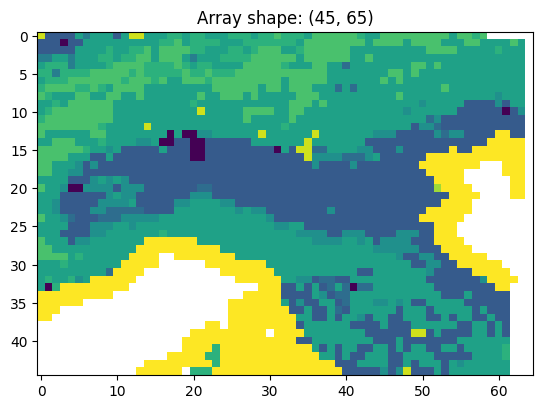

In [16]:
corine = open_land_cover()
fig, ax = plt.subplots()
ax.imshow(corine)
ax.set_title(f"Array shape: {corine.shape}")
plt.show()

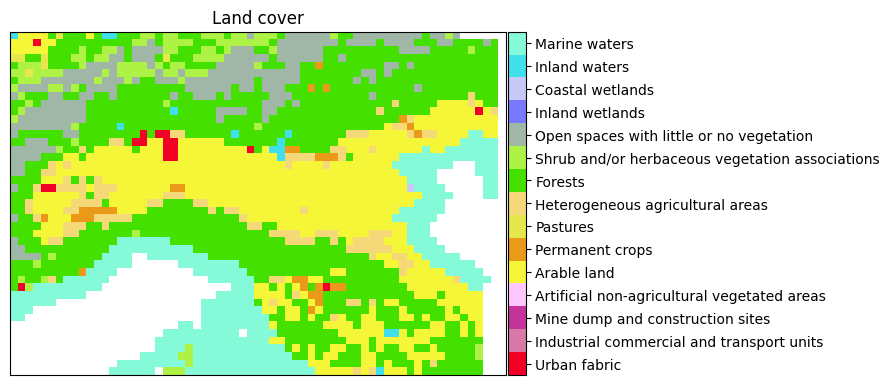

In [29]:
fig, ax = plt.subplots()
class_colormap = utils.open_land_cover_colormap()
mappable = ListedColormap(class_colormap.values())
vals = ax.matshow(corine-1, cmap=mappable, vmin=-0.5, vmax=len(class_colormap) - 0.5)
add_colorbar(fig, vals, class_colormap.keys(), ax, x_shift=0.12)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Land cover")
plt.show()

Load DEM (`utils.open_dem`)

In [30]:
def open_dem(no_data_val=-3.40e38):
    try:
        dem_tif = rasterio.open("data/DEM.tif").read(1)
        dem_tif[dem_tif < no_data_val] = np.nan
    except NameError:  # if could not install rasterio, fall back to saved numpy array
        dem_tif = np.load("data/DEM.npy")
    return dem_tif


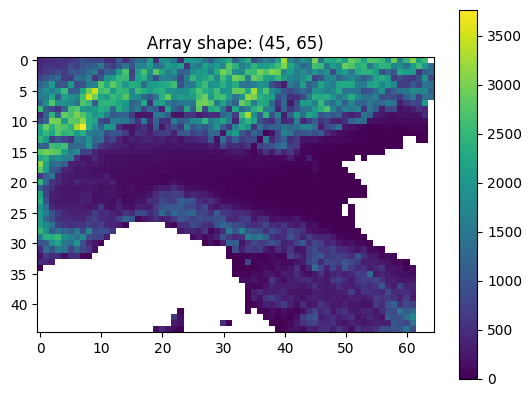

In [31]:
dem = open_dem()
fig, ax = plt.subplots()
vals = ax.imshow(dem)
fig.colorbar(vals, ax=ax)
ax.set_title(f"Array shape: {dem.shape}")
plt.show()
